# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [51]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [52]:
df.head()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [54]:
from sklearn.model_selection import train_test_split

X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
X_train.shape

(5100, 58)

In [56]:
X_test.shape

(1276, 58)

In [57]:
X_train.shape

(5100, 58)

In [58]:
y_test.shape

(1276,)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [59]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [60]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [61]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(y_test, y_pred,squared = False)
tree_mse

24884.633455918134

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [74]:
rmses_train = []
rmses_test = []

for i in range(1,30, 5):
    tree_reg = DecisionTreeRegressor(max_depth=i*5)
    tree_reg.fit(X_train, y_train)
    y_pred_test = tree_reg.predict(X_test)
    y_pred_train = tree_reg.predict(X_train)    
    rmses_test.append(mean_squared_error(y_test, y_pred_test,squared = False))
    rmses_train.append(mean_squared_error(y_train, y_pred_train,squared = False))

In [75]:
# Se normalizan los valores del error cuadrático medio
import numpy as np

print(rmses_train)
print(rmses_test)

[21170.403344931623, 526.3339719538154, 526.3339719538154, 526.3339719538154, 526.3339719538154, 526.3339719538154]
[22247.803452301796, 25067.036989945314, 24978.630392233048, 24839.230092055786, 25198.204582266288, 24845.493412425258]


Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

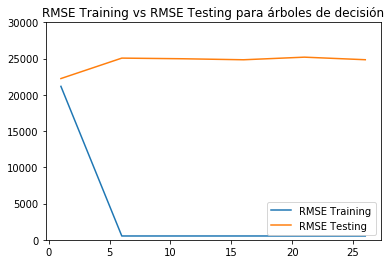

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [84]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(X, y)

# se realizá la predicción
y_pred = neigh.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred,squared = False)
knn_mse

18113.932462959852

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [88]:
# Calculá los cambio en el rmse en esta celda

rmses_train = []
rmses_test = []

for i in range(1,30, 1):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X, y)
    y_pred_train = neigh.predict(X_train)   
    y_pred_test = neigh.predict(X_test)
    rmses_test.append(mean_squared_error(y_test, y_pred_test,squared = False))
    rmses_train.append(mean_squared_error(y_train, y_pred_train,squared = False))

In [89]:
print(rmses_train)
print(rmses_test)

[702.8411051010091, 13623.190527760251, 16227.675135639274, 17491.321287348266, 18399.213118089552, 19026.402015068197, 19499.774333619705, 19840.193598192232, 20145.602647883563, 20399.307236831162, 20596.63574772355, 20771.974909600205, 21004.9819790521, 21167.424570633666, 21264.289128455148, 21388.658196969827, 21455.264751602037, 21565.577452417037, 21663.441777291115, 21742.50235886645, 21836.237600990386, 21902.967458474614, 21981.221218364615, 22043.06827374303, 22110.75189457981, 22163.705347506973, 22238.353839709394, 22317.511389680894, 22373.745291211028]
[810.6368877574616, 13107.281471340557, 15765.854686484949, 17149.53468640624, 18113.932462959852, 18646.987281087037, 19346.453990527658, 19623.636460514557, 19875.189059300432, 20042.948586187304, 20260.7652178221, 20366.199119717316, 20576.570497856253, 20612.02229772523, 20732.375247315867, 20877.48486657593, 21011.922578392452, 21113.101758603836, 21212.19002404512, 21266.07426265604, 21339.181393300434, 21395.4087176

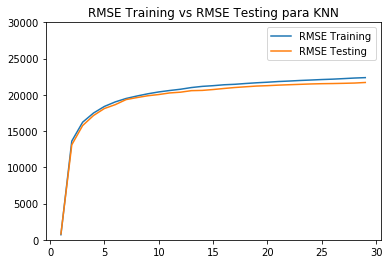

In [90]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [91]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [97]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score

regressor = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(regressor, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)

mse_scores = nmsq2rmse(scores)

print("Scores: ", mse_scores)
print("Promedio: ", mse_scores.mean())
print("Desvío estandar: ", mse_scores.std())

Scores:  [21339.61156931 21155.38358516 23101.30645197 21573.98699767
 22617.76339868 23120.38568626 21706.71400993 21951.1392186
 21191.06057582 22360.03707658]
Promedio:  22011.73885699601
Desvío estandar:  710.7590434498273


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [93]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [94]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [95]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,139000.000,59000.000
1,128000.000,145000.000,17000.000
2,150000.000,178000.000,28000.000
3,85000.000,120000.000,35000.000
4,135000.000,110000.000,25000.000
5,135000.000,155100.000,20100.000
6,68000.000,75000.000,7000.000
7,110000.000,155000.000,45000.000
8,134000.000,179000.000,45000.000
9,110000.000,73000.000,37000.000
